In [4]:
# Pre Process the data : 
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import datetime
import os

path = "/Users/martin/Desktop/Cours/Advanced Computing techniques 2018/Project/"
os.chdir(path)

import extra_function_date as func

filename = "results.csv"
filename_woWC = "results_wo_WC2014.csv"
filename_WC ="result_2014_WC.csv"
filename_2018 ="data_WC2018.csv"
dtype = (object,4)

#read the 3 data set : 1: all games, 2:all games execpt 2014 World Cup, 3: only 2014 World cup
X = np.genfromtxt(path+ filename, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])
X_woWC = np.genfromtxt(path+ filename_woWC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])
X_WC = np.genfromtxt(path+ filename_WC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])
X_2018 = np.genfromtxt(path+ filename_2018, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[1,2,5,8])
date_2018 = np.genfromtxt(path+ filename_2018, delimiter=",",dtype=(str,10), skip_header=1, encoding=None,usecols=[0])

n = len(X[:,0])
print(n)

print(X_woWC[0,:])
print(X_woWC[1,:])

#Encode the playing country, make sure that away and home team are encoded in the same way
le_country = LabelEncoder().fit(X[:,1])
X[:,0] = le_country.transform(X[:,0])
X_WC[:,0] = le_country.transform(X_WC[:,0])
X_woWC[:,0] = le_country.transform(X_woWC[:,0])
X_2018[:,0] = le_country.transform(X_2018[:,0])
X[:,1] = le_country.transform(X[:,1])
X_WC[:,1] = le_country.transform(X_WC[:,1])
X_woWC[:,1] = le_country.transform(X_woWC[:,1])
X_2018[:,1] = le_country.transform(X_2018[:,1])

#Encode the the rest : 
todo = [2,3]
for i in todo:
    le = LabelEncoder().fit(X[:,i])
    X[:,i] = le.transform(X[:,i])
    X_WC[:,i] = le.transform(X_WC[:,i])
    X_woWC[:,i] = le.transform(X_woWC[:,i])
    X_2018[:,i] = le.transform(X_2018[:,i])

# one = OneHotEncoder().fit(X[:,3:5])
# X[:,3:5] = one.transform(X[:,3:5])

print(np.shape(X))

#get the label: 
dtype = (int,2)
y = np.genfromtxt(path+ filename, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[3,4])
y_WC = np.genfromtxt(path+ filename_WC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[3,4])
y_woWC = np.genfromtxt(path+ filename_woWC, delimiter=",", skip_header=1, dtype=dtype, encoding=None,usecols=[3,4])

def get_label(y):
    label = y[:,0]-y[:,1]    
    label_classifier =[]
    
    for i,x in enumerate(label):
        if x > 0 : 
            label_classifier.append(0)#home win
        elif x == 0:
            label_classifier.append(1)#draw
        else:
            label_classifier.append(2)#away win 
    return label_classifier
        
# label_classifier = np.asarray(label_classifier).reshape(-1, 1)
# print (label_classifier)

label_classifier = np.asarray(get_label(y))
label_classifier_WC = np.asarray(get_label(y_WC))
label_classifier_woWC = np.asarray(get_label(y_woWC))

# one_hot_lab = OneHotEncoder(categorical_features = [0], sparse = False)
# label_classifier = one_hot_lab.fit_transform(label_classifier.reshape(-1,1))

# print(np.shape(label_classifier_woWC))
# print(np.shape(label_classifier))
print(X_woWC[0,:])
print(X[0,:])
print(X_2018[0,:])

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, label_classifier, train_size = 0.8)



38925
[b'Scotland' b'England' b'Friendly' b'FALSE']
[b'England' b'Scotland' b'Friendly' b'FALSE']


(38925, 4)


[180 64 47 0]
[180 64 47 0]
[173 179 45 0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
#Optimize the Random Forest Classifier on 80/20 split data set : 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_single = tree.predict(X_validation)

trees = RandomForestClassifier(n_estimators=20, max_depth=7)
trees.fit(X_train, y_train)
print(trees.predict(X_validation)[10:20])
print(trees.score(X_validation,y_validation))

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_grid = {"max_depth": [10,50,100,1000],
              "min_samples_leaf": [5, 10,50],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

clf = RandomForestClassifier(n_estimators=40)
start = time.time()
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

best_param = grid_search.best_estimator_





[0 0 0 0 0 0 0 0 0 0]
0.5016056518946692


GridSearchCV took 131.79 seconds for 48 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.513 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 10}

Model with rank: 2
Mean validation score: 0.513 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 1000, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.512 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 1000, 'min_samples_leaf': 10}



0.5296082209377007
Confusion matrix, without normalization
[[3317   85  414]
 [1367   58  334]
 [1397   65  748]]


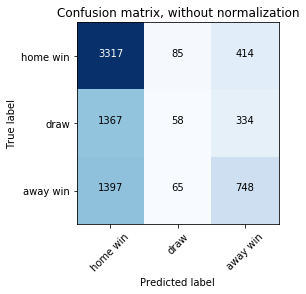

In [6]:
#PLot the mixing matrix 
print(best_param.score(X_validation,y_validation))
# print(best_param.predict(X_validation))
# print(best_param.predict_proba(X_validation))

from sklearn.metrics import confusion_matrix
import extra_function_date as func
from importlib import reload
reload(func)
y_pred = best_param.predict(X_validation)
cnf_matrix = confusion_matrix(y_validation,y_pred)

class_names = ['home win','draw','away win']
func.plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


In [7]:
#test if the algorithm perform better if we use only the results from 2000, it migh contains only the usefull data...  
#test also if it gives better results if we train on all data but the 2014WC and test on the 2014 WC.

reduced_X = X[22227:]
label_reduced = label_classifier[22227:]

X_train_reduced, X_validation_reduced, y_train_reduced, y_validation_reduced = train_test_split(reduced_X, label_reduced, train_size = 0.8)
X_train_woWC, X_validation_woWC, y_train_woWC, y_validation_woWC = train_test_split(X_woWC, label_classifier_woWC, train_size = 0.8)

clf2 = RandomForestClassifier(n_estimators=40)
clf3 = RandomForestClassifier(n_estimators=40)
start = time.time()
grid_search2 = GridSearchCV(clf2, param_grid=param_grid)
grid_search3 = GridSearchCV(clf3, param_grid=param_grid)
grid_search2.fit(X_train_reduced, y_train_reduced)
grid_search3.fit(X_woWC, label_classifier_woWC)
print("Fitting the data on all the games since 2000.")
print("GridSearchCV2 took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search2.cv_results_['params'])))
report(grid_search2.cv_results_)

print("Fitting the data on everything but the 2014 WC.")
print("GridSearchCV3 took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search3.cv_results_['params'])))
report(grid_search3.cv_results_)





/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Fitting the data on all the games since 2000.
GridSearchCV2 took 237.37 seconds for 48 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.500 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

Model with rank: 2
Mean validation score: 0.500 (std: 0.006)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.499 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

Fitting the data on everything but the 2014 WC.
GridSearchCV3 took 237.37 seconds for 48 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.502 (std: 0.013)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 10}

Model with rank: 2
Mean validation score: 0.502 (std: 0.012)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 100

Score on the data since 2000 on test set :
0.5263473053892216
Confusion matrix, without normalization
[[1549    8  102]
 [ 656   11  113]
 [ 699    4  198]]


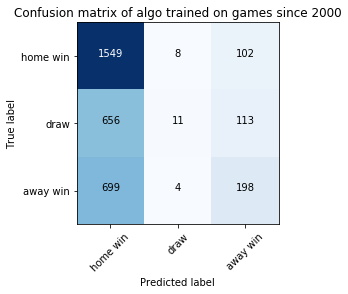

Score on all the data but WC2014 on test set :
0.5950328143096126
Score on all the data but WC2014 on test on the WC2014 :
0.4444444444444444


Confusion matrix, without normalization
[[3460   46  234]
 [1372  180  322]
 [1106   67  984]]


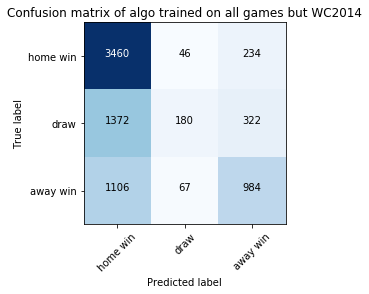

In [10]:
#PLot the mixing matrix according to the 2 new splitting stragies
best_param2 = grid_search2.best_estimator_
best_param3 = grid_search3.best_estimator_

print("Score on the data since 2000 on test set :")
print(best_param2.score(X_validation_reduced,y_validation_reduced))
# print(best_param.predict(X_validation))
# print(best_param2.predict_proba(X_validation_reduced))

y_pred_reduced = best_param2.predict(X_validation_reduced)
cnf_matrix = confusion_matrix(y_validation_reduced,y_pred_reduced)

func.plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of algo trained on games since 2000')
plt.show()

print("Score on all the data but WC2014 on test set :")
print(best_param3.score(X_validation_woWC,y_validation_woWC))
print("Score on all the data but WC2014 on test on the WC2014 :")
print(best_param3.score(X_WC,label_classifier_WC))
#there is something strange here RFC scores better when we remove the WC2014 data, but it is really bad at predicting the result of the 2014WC....

y_pred_woWC= best_param3.predict(X_validation_woWC)
cnf_matrix = confusion_matrix(y_validation_woWC,y_pred_woWC)

func.plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of algo trained on all games but WC2014')

Score of the algorythm trained on 1)everything 2)all the games since 2000 3)all the games but 2014 WC to predict 
0.5714285714285714
0.5555555555555556
0.4444444444444444
Confusion matrix, without normalization
[[22  0  6]
 [ 9  2  2]
 [ 9  1 12]]


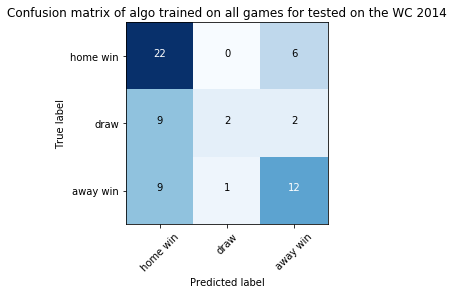

In [12]:
#estimate the accuracy on the 2014 WC :
# I know that I should not train and test my data on the same data set, but just for curiosity....
#of course the models trained on the testing set, give better accuracy... 

print("Score of the algorythm trained on 1)everything 2)all the games since 2000 3)all the games but 2014 WC to predict ")
print(best_param.score(X_WC,label_classifier_WC))
print(best_param2.score(X_WC,label_classifier_WC))
print(best_param3.score(X_WC,label_classifier_WC))

y_pred_WC= best_param.predict(X_WC)
cnf_matrix = confusion_matrix(label_classifier_WC,y_pred_WC)

func.plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix of algo trained on all games for tested on the WC 2014')

In [14]:
#Conclusion we need all the data ! 
#Now try to result of 2018 WC 
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

y_2018 = best_param.predict(X_2018)
y_2018_proba = np.asarray(best_param.predict_proba(X_2018))
print(y_2018)



for i in range (len(X_2018[:,0])): 
    home_country = le_country.inverse_transform(X_2018[i,0])
    away_country = le_country.inverse_transform(X_2018[i,1])
    if y_2018[i] == 0 : 
        print(date_2018[i] + " : " + str(home_country) + " vs " + str(away_country)+ ", predicted results : home win with probability " + str(y_2018_proba[i,0])) 
    elif y_2018[i] == 1 : 
        print(date_2018[i] + " : " + str(home_country) + " vs " + str(away_country)+ ", predicted results : draw with probability " + str(y_2018_proba[i,1])) 
        
    elif y_2018[i] == 2 : 
        print(date_2018[i] + " : " + str(home_country) + " vs " + str(away_country)+ ", predicted results : away win with probability " + str(y_2018_proba[i,2])) 
        




[0 2 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 2 0 2 2 0
 0 2 1 2 0 2 2 1 0 0 2]
2018-06-14 : b'Russia' vs b'Saudi Arabia', predicted results : home win with probability 0.44873710705425046
2018-06-15 : b'Egypt' vs b'Uruguay', predicted results : away win with probability 0.5358474324372964
2018-06-15 : b'Morocco' vs b'Iran', predicted results : away win with probability 0.4682256279720452
2018-06-15 : b'Portugal' vs b'Spain', predicted results : away win with probability 0.45072659931150066
2018-06-16 : b'France' vs b'Australia', predicted results : home win with probability 0.5794966360510282
2018-06-16 : b'Argentina' vs b'Iceland', predicted results : home win with probability 0.5307277561805895
2018-06-16 : b'Peru' vs b'Denmark', predicted results : home win with probability 0.4139303903686845
2018-06-16 : b'Croatia' vs b'Nigeria', predicted results : home win with probability 0.45986742317954016
2018-06-17 : b'Costa Rica' vs b'Serbia', predicted results : home wi

In [15]:
#Now compute the expectation using the odds of the bookmakers : 
filename_odds = "data_odds_2018WC.csv"
odds = np.genfromtxt(path+ filename_odds, delimiter=",",dtype=(float,3), skip_header=1, encoding=None,usecols=[3,4,5])
odds = np.asarray(odds)
print(np.shape(odds))
print(np.shape(X_2018))

expectation = [] 

for i in range (len(X_2018[:,0])): 
    home_country = le_country.inverse_transform(X_2018[i,0])
    away_country = le_country.inverse_transform(X_2018[i,1])

    if y_2018[i] == 0 : 
        expectation.append(y_2018_proba[i,0]* odds[i,0])
        print(date_2018[i] + " : " + str(home_country) + " vs " + str(away_country)+ ", predicted results : home win, expectation :" + str(expectation[i]) ) 
    elif y_2018[i] == 1 : 
        expectation.append(y_2018_proba[i,1]*odds[i,1])
        print(date_2018[i] + " : " + str(home_country) + " vs " + str(away_country)+ ", predicted results : draw, expectation :" + str(expectation[i]) ) 
        
    elif y_2018[i] == 2 : 
        expectation.append(y_2018_proba[i,2]*odds[i,2])
        print(date_2018[i] + " : " + str(home_country) + " vs " + str(away_country)+ ", predicted results : away win, expectation :" + str(expectation[i]) ) 

(48, 3)
(48, 4)
2018-06-14 : b'Russia' vs b'Saudi Arabia', predicted results : home win, expectation :0.6057950945232382
2018-06-15 : b'Egypt' vs b'Uruguay', predicted results : away win, expectation :0.8519974175753012
2018-06-15 : b'Morocco' vs b'Iran', predicted results : away win, expectation :1.6762477481399218
2018-06-15 : b'Portugal' vs b'Spain', predicted results : away win, expectation :0.8789168686574262
2018-06-16 : b'France' vs b'Australia', predicted results : home win, expectation :0.7127808623427646
2018-06-16 : b'Argentina' vs b'Iceland', predicted results : home win, expectation :0.7164824708437959
2018-06-16 : b'Peru' vs b'Denmark', predicted results : home win, expectation :1.5687961794973142
2018-06-16 : b'Croatia' vs b'Nigeria', predicted results : home win, expectation :0.8645507555775355
2018-06-17 : b'Costa Rica' vs b'Serbia', predicted results : home win, expectation :1.7344593709407423
2018-06-17 : b'Germany' vs b'Mexico', predicted results : home win, expecta

In [18]:
odds_predicition = [np.argmin(odds[i,:]) for i in range(len(odds))]  #get the lowest odds as the favorite 
count = 0 
for i in range(len(odds)):
    home_country = le_country.inverse_transform(X_2018[i,0])
    away_country = le_country.inverse_transform(X_2018[i,1])
    if odds_predicition[i] != y_2018[i]: 
        print("Bookmaker odds and prediction disagree for the game : "+ str(home_country) + " vs " + str(away_country))
        count +=1 
        
print("RFC gives expected result of the bookmaker in %2.2f %% of the cases "%(count/len(odds)*100))

Bookmaker odds and prediction disagree for the game : b'Morocco' vs b'Iran'
Bookmaker odds and prediction disagree for the game : b'Peru' vs b'Denmark'
Bookmaker odds and prediction disagree for the game : b'Costa Rica' vs b'Serbia'
Bookmaker odds and prediction disagree for the game : b'Belgium' vs b'Panama'
Bookmaker odds and prediction disagree for the game : b'Uruguay' vs b'Saudi Arabia'
Bookmaker odds and prediction disagree for the game : b'Iran' vs b'Spain'
Bookmaker odds and prediction disagree for the game : b'Belgium' vs b'Tunisia'
Bookmaker odds and prediction disagree for the game : b'Japan' vs b'Senegal'
Bookmaker odds and prediction disagree for the game : b'Poland' vs b'Colombia'
Bookmaker odds and prediction disagree for the game : b'Spain' vs b'Morocco'
Bookmaker odds and prediction disagree for the game : b'Australia' vs b'Peru'
Bookmaker odds and prediction disagree for the game : b'Denmark' vs b'France'
Bookmaker odds and prediction disagree for the game : b'Nigeria